<a href="https://colab.research.google.com/github/mits1923/IDS/blob/main/Final_MACHINELEARNING_DOSPRO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import sys
import sklearn
import itertools
import random
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import regularizers
import xgboost as xgb
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')
%matplotlib inline

# Avoid Printing Warnings

from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
col_names = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell'
,'su_attempted','num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate'
,'rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','attack','last_flag'])

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/Copy of KDDTrain+.txt', header=None,names=col_names)
df_test = pd.read_csv('/content/drive/MyDrive/Dataset/Copy of KDDTest+.txt', header=None,names=col_names)

In [ ]:
data_train=df.append(df_test)
#data_train=df


In [ ]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,184,25,1.0,1.0,0.0,0.0,0.14,0.06,0.00,255,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,144,8,1.0,1.0,0.0,0.0,0.06,0.05,0.00,255,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [ ]:
data_train.shape

(148517, 43)

In [ ]:
def pie_plot(df, cols_list, rows, cols):
    fig, axes = plt.subplots(rows, cols)
    for ax, col in zip(axes.ravel(), cols_list):
        df[col].value_counts().plot(ax=ax, kind='pie', figsize=(15, 15), fontsize=10, autopct='%1.0f%%')
        ax.set_title(str(col), fontsize = 12)
    plt.show()

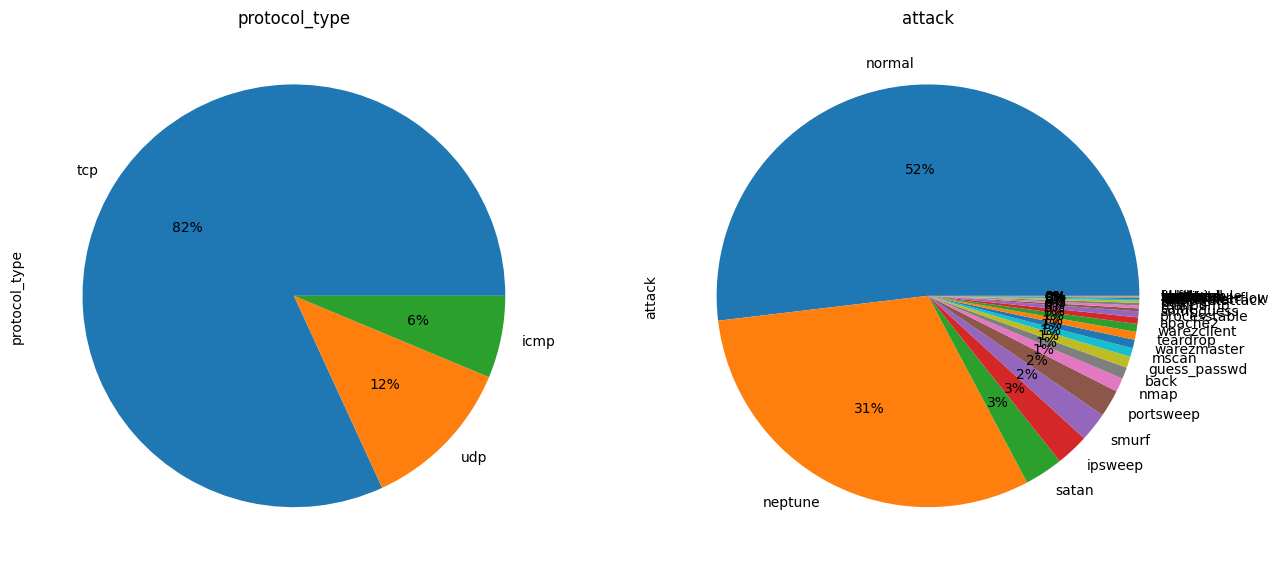

In [ ]:
pie_plot(data_train, ['protocol_type', 'attack'], 1, 2)

In [ ]:
data_train["Attack_type"]=np.where(data_train.attack=="normal",0,1)

In [ ]:
def Attack_class(x):
    if(x in DOS):
        return 1 #"DOS"
    elif(x in Probe):
        return 2 #"PROBE"
    elif(x in R2L):
        return 3 #"R2L"
    elif(x in U2R):
        return 4 #"U2R"
    else:
        return 5 #"normal"

In [ ]:
DOS=["back","land","neptune","pod","smurf","teardrop","apache2","udpstorm","processtable","worm"]
Probe=["satan","ipsweep","nmap","portsweep","mscan","saint"]
R2L=["guess_passwd","ftp_write","imap","phf","multihop","warezmaster","warezclient","spy","xlock","xsnoop","snmpguess","snmpgetattack","httptunnel","sendmail","named"]
U2R=["buffer_overflow","loadmodule","rootkit","perl","sqlattack","xterm","ps"]

In [ ]:
data_train.shape

(148517, 44)

In [ ]:
data_train.attack.unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl', 'saint', 'mscan', 'apache2',
       'snmpgetattack', 'processtable', 'httptunnel', 'ps', 'snmpguess',
       'mailbomb', 'named', 'sendmail', 'xterm', 'worm', 'xlock',
       'xsnoop', 'sqlattack', 'udpstorm'], dtype=object)

In [ ]:
data_train["Attack_class"]=data_train.attack.apply(Attack_class)
data_train.drop("attack", inplace=True, axis=1)
data_train.head(20)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag,Attack_type,Attack_class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.00,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,20,0,5
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.00,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15,0,5
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.00,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19,1,1
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.20,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21,0,5
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.00,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21,0,5
5,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.00,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,21,1,1
6,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,166,9,1.0,1.00,0.0,0.0,0.05,0.06,0.00,255,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,21,1,1
7,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,117,16,1.0,1.00,0.0,0.0,0.14,0.06,0.00,255,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,21,1,1
8,0,tcp,remote_job,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,270,23,1.0,1.00,0.0,0.0,0.09,0.05,0.00,255,23,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,21,1,1
9,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,133,8,1.0,1.00,0.0,0.0,0.06,0.06,0.00,255,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,21,1,1


In [ ]:
data_train.Attack_class.unique()


array([5, 1, 3, 2, 4])

In [ ]:
data_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag,Attack_type,Attack_class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,20,0,5
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15,0,5
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19,1,1
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21,0,5
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21,0,5


In [ ]:
dataframe=data_train

In [ ]:
dataframe = pd.get_dummies(dataframe, columns = ['protocol_type', 'service', 'flag'])

In [ ]:
dataframe.shape

(148517, 125)

In [ ]:
dataframe.Attack_class.unique()

array([5, 1, 3, 2, 4])

In [ ]:
train=dataframe

In [ ]:
key=pd.DataFrame(columns=dataframe.columns)
k=train[train['Attack_class']==1]
key=key.append(k)
k=train[train['Attack_class']==2]
key=key.append(k)
k=train[train['Attack_class']==5]
key=key.append(k)

In [ ]:
key.Attack_class.unique()


array([1, 2, 5], dtype=object)

In [ ]:
key.columns[60:100]

Index(['service_efs', 'service_exec', 'service_finger', 'service_ftp',
       'service_ftp_data', 'service_gopher', 'service_harvest',
       'service_hostnames', 'service_http', 'service_http_2784',
       'service_http_443', 'service_http_8001', 'service_imap4',
       'service_iso_tsap', 'service_klogin', 'service_kshell', 'service_ldap',
       'service_link', 'service_login', 'service_mtp', 'service_name',
       'service_netbios_dgm', 'service_netbios_ns', 'service_netbios_ssn',
       'service_netstat', 'service_nnsp', 'service_nntp', 'service_ntp_u',
       'service_other', 'service_pm_dump', 'service_pop_2', 'service_pop_3',
       'service_printer', 'service_private', 'service_red_i',
       'service_remote_job', 'service_rje', 'service_shell', 'service_smtp',
       'service_sql_net'],
      dtype='object')

In [ ]:
scaled_train=key

In [ ]:
x = scaled_train.drop(['Attack_class'] , axis = 1).values
y = scaled_train['Attack_class'].values
y_reg = scaled_train['Attack_class'].values

pca = PCA(n_components=20)
pca = pca.fit(x)
x_reduced = pca.transform(x)
print("Number of original features is {} and of reduced features is {}".format(x.shape[1], x_reduced.shape[1]))

y = y.astype('int')
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced = train_test_split(x_reduced, y, test_size=0.2, random_state=42)
x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(x, y_reg, test_size=0.2, random_state=42)


Number of original features is 124 and of reduced features is 20


In [ ]:
kernal_evals = dict()
def evaluate_classification(model, name, X_train, X_test, y_train, y_test):
    train_accuracy = metrics.accuracy_score(y_train, model.predict(X_train))
    test_accuracy = metrics.accuracy_score(y_test, model.predict(X_test))

    train_precision = metrics.precision_score(y_train, model.predict(X_train),average='macro')
    test_precision = metrics.precision_score(y_test, model.predict(X_test),average='macro')

    train_f1 = metrics.f1_score(y_train, model.predict(X_train),average='macro')
    test_f1 = metrics.f1_score(y_test, model.predict(X_test),average='macro')

    train_dr = metrics.recall_score(y_train, model.predict(X_train),average='macro')
    test_dr = metrics.recall_score(y_test, model.predict(X_test),average='macro')

    #train_far = metrics.recall_score(y_train, model.predict(X_train),average='macro')
    #test_far = metrics.recall_score(y_test, model.predict(X_test),average='macro')

    kernal_evals[str(name)] = [train_accuracy, test_accuracy, train_precision, test_precision, train_f1, test_f1,train_dr,test_dr]
    print("Test Accuracy ".format(train_accuracy*100) + str(name) + " {}".format(test_accuracy*100))
    print("Test Precesion ".format(train_precision*100) + str(name) + " {}".format(test_precision*100))
    print("Test F1 ".format(train_f1*100) + str(name) + " {}".format(test_f1*100))
    print("Test Detection Rate ".format(train_dr*100) + str(name) + " {}".format(test_dr*100))
    #print("Test FAR ".format(train_far*100) + str(name) + " {}".format(test_far*100))




    actual = y_test
    predicted = model.predict(X_test)
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    ccm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['DOS', 'Probe','Normal'])


    fig, ax = plt.subplots(figsize=(10,10))
    ax.grid(False)
    ccm_display.plot(ax=ax)

In [ ]:
import time

Training Accuracy RANDOMFOREST 100.0  Test Accuracy RANDOMFOREST 99.9839910349796
Training Precesion RANDOMFOREST 100.0  Test Precesion RANDOMFOREST 99.98895865259966
Training Recall RANDOMFOREST 100.0  Test Recall RANDOMFOREST 99.9634730719008


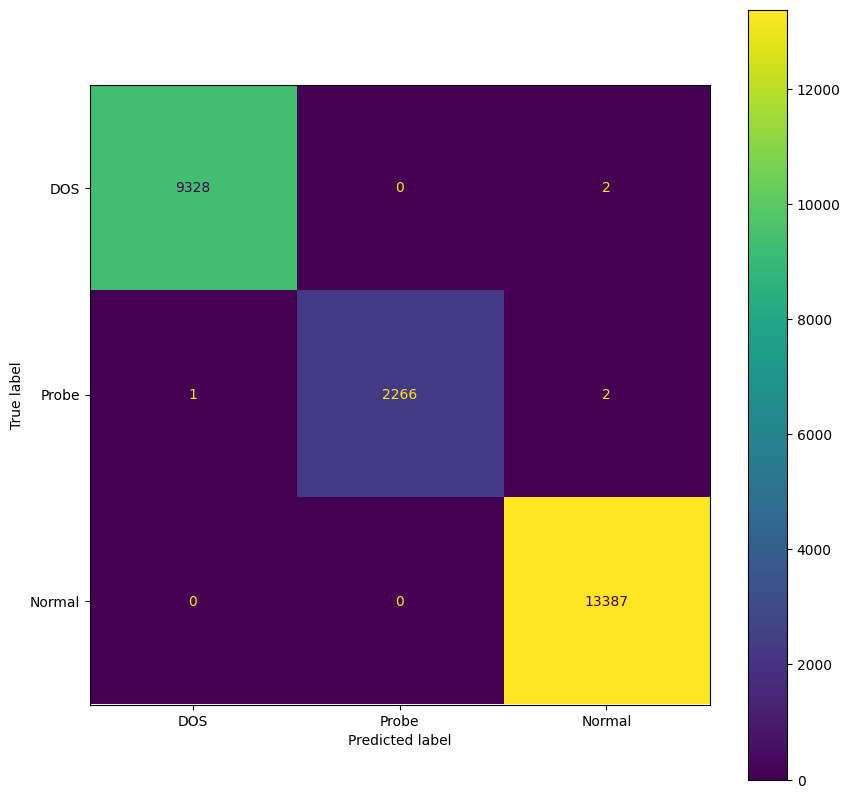

In [ ]:
#RANDOMFOREST
rfp = RandomForestClassifier().fit(x_train_reduced,y_train_reduced)
evaluate_classification(rfp, "RANDOMFOREST", x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced)

Training Accuracy RANDOMFOREST 100.0  Test Accuracy RANDOMFOREST 99.99599775874489
Training Precesion RANDOMFOREST 100.0  Test Precesion RANDOMFOREST 99.98531571218795
Training Recall RANDOMFOREST 100.0  Test Recall RANDOMFOREST 99.99642729546267


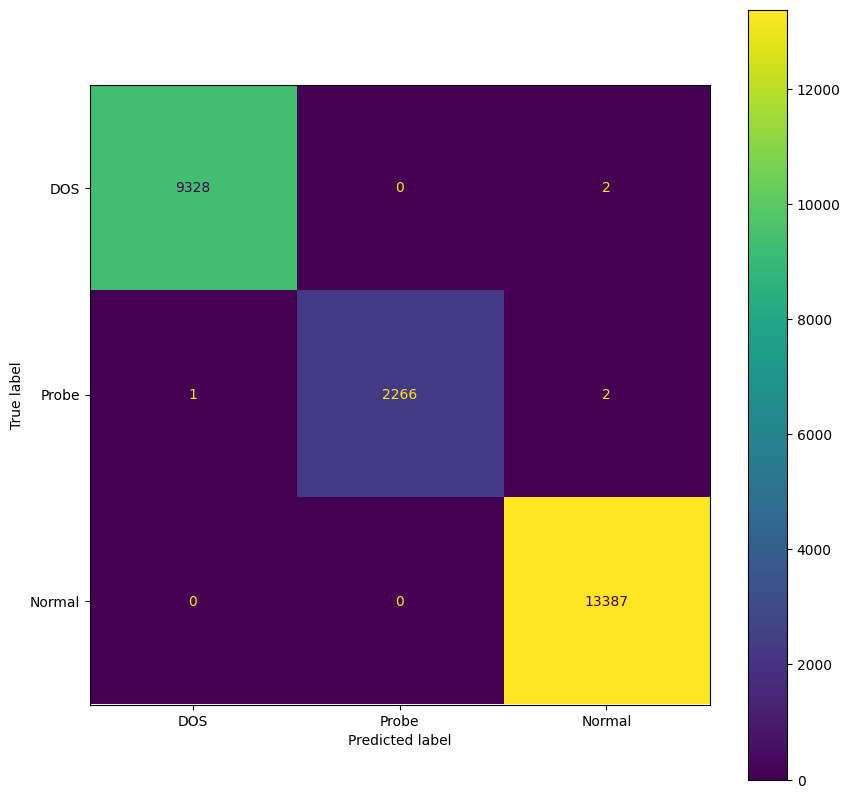

In [ ]:
rf = RandomForestClassifier().fit(x_train,y_train)
evaluate_classification(rf, "RANDOMFOREST", x_train, x_test, y_train, y_test)

Training Accuracy LinearSVM 98.21592955773464  Test Accuracy LinearSVM 98.24701833026495
Training Precesion LinearSVM 98.3991683716255  Test Precesion LinearSVM 98.46198891589847
Training Recall LinearSVM 98.68788784748624  Test Recall LinearSVM 98.69656278449875


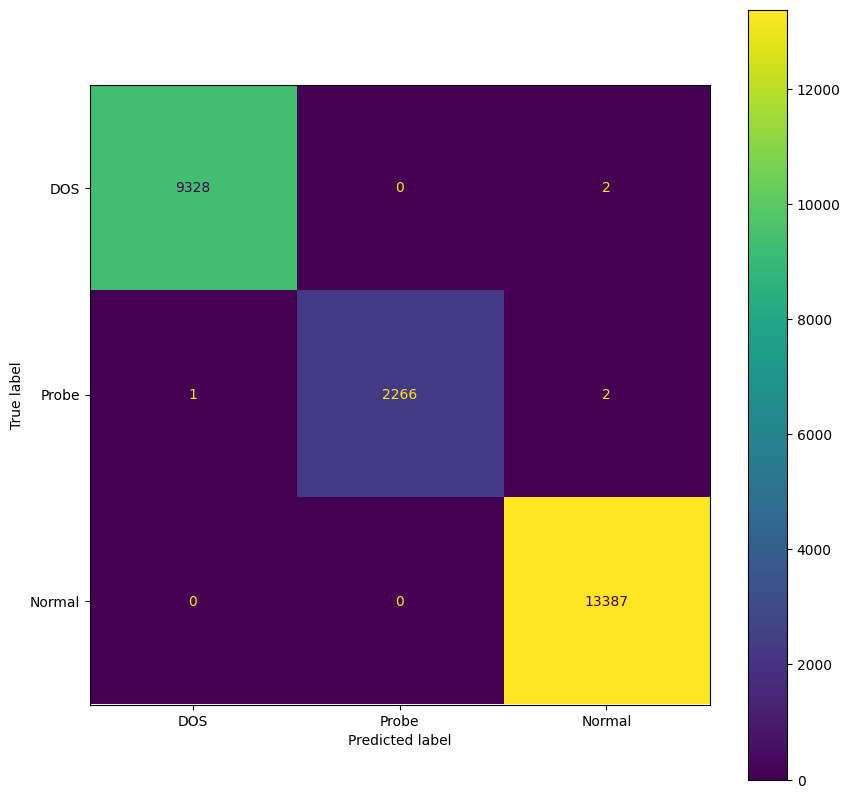

In [ ]:
#LinearSVM
lin_svc = svm.LinearSVC().fit(x_train, y_train)
evaluate_classification(lin_svc, "LinearSVM", x_train, x_test, y_train, y_test)

Training Accuracy LinearSVMT 84.64578747248349  Test Accuracy LinearSVMT 84.89153926198671
Training Precesion LinearSVMT 70.41314082893079  Test Precesion LinearSVMT 70.38762693452068
Training Recall LinearSVMT 68.98719070046869  Test Recall LinearSVMT 69.0653847421319


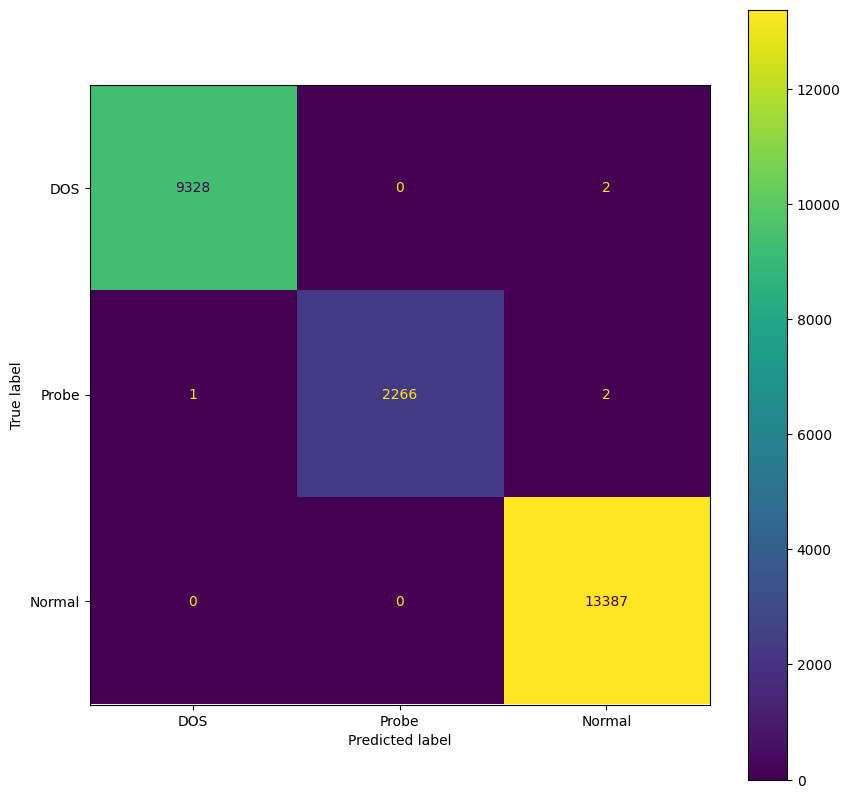

In [ ]:
lin_svcp = svm.LinearSVC().fit(x_train_reduced, y_train_reduced)
evaluate_classification(lin_svcp, "LinearSVMT", x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced)


Training Accuracy KNeighborsClassifier 99.58174904942966  Test Accuracy KNeighborsClassifier 99.34763467541823
Training Precesion KNeighborsClassifier 99.21800582718858  Test Precesion KNeighborsClassifier 98.62385626776658
Training Recall KNeighborsClassifier 99.13372881694572  Test Recall KNeighborsClassifier 98.7133015156361


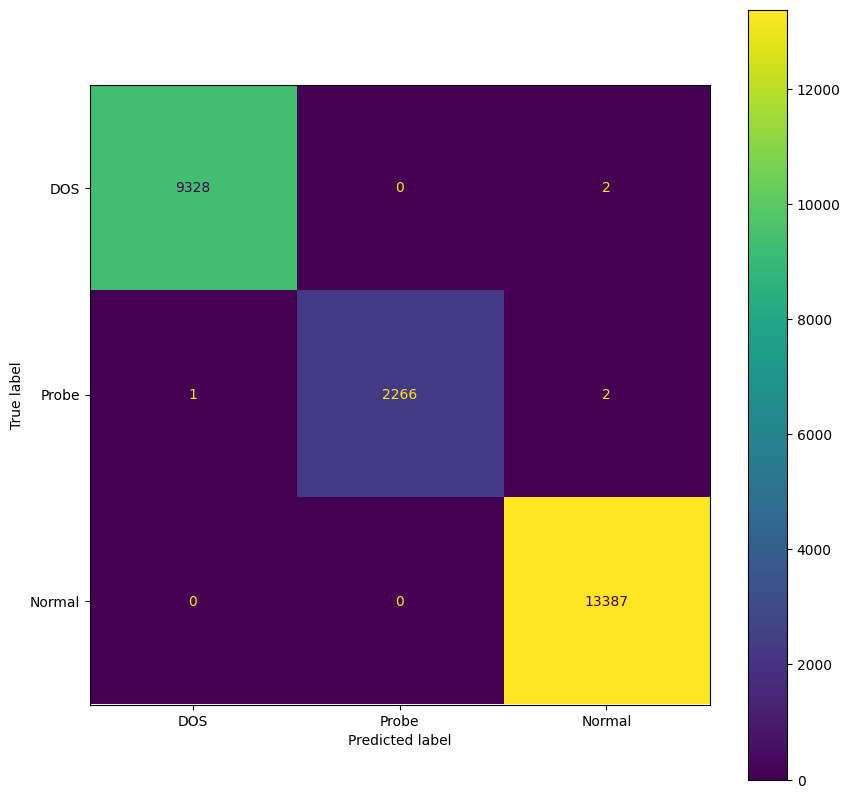

In [ ]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
clf_KNN=KNeighborsClassifier()
clf_KNN.fit(x_train, y_train.astype(int))
evaluate_classification(clf_KNN, "KNeighborsClassifier", x_train, x_test, y_train, y_test)

0.025817155838012695  seconds
Test Accuracy KNeighborsClassifierT 99.0693329642956
Test Precesion KNeighborsClassifierT 98.35731841773728
Test F1 KNeighborsClassifierT 98.2604183742763
Test Detection Rate KNeighborsClassifierT 98.16541016892074


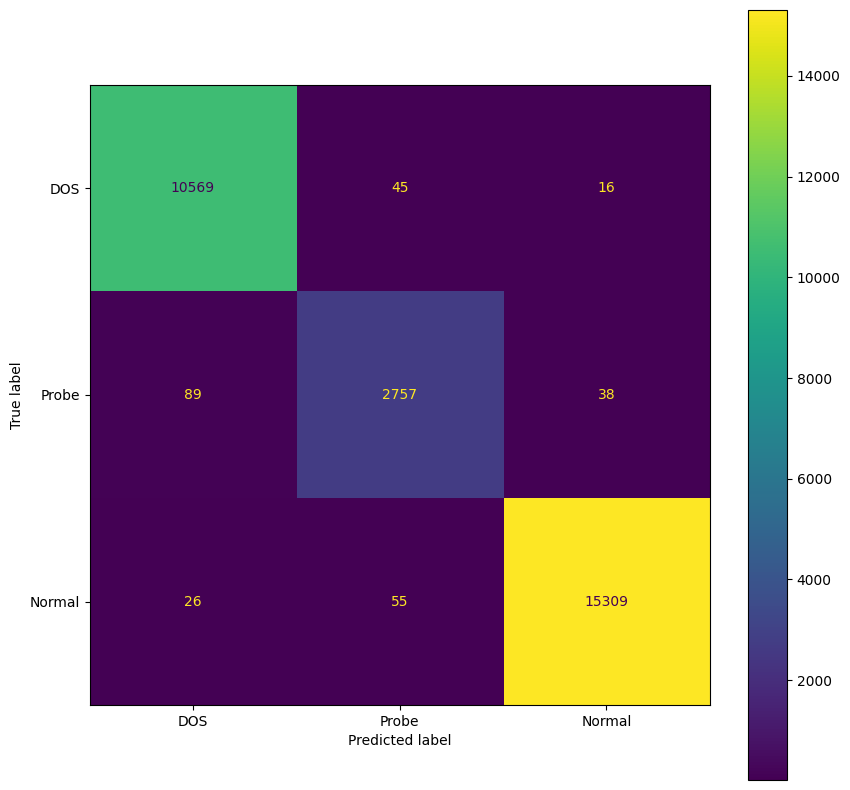

In [ ]:
st=time.time()
clf_KNNp=KNeighborsClassifier()
clf_KNNp.fit(x_train_reduced, y_train_reduced.astype(int))
et=time.time()
print(et-st," seconds")



evaluate_classification(clf_KNNp, "KNeighborsClassifierT", x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced)

In [ ]:
st=time.time()
metrics.accuracy_score(y_test_reduced, clf_KNNp.predict(x_test_reduced))
et=time.time()
print(et-st," seconds")

20.032032012939453  seconds


In [ ]:
#GRADIENT BOOSTING
gb_mod = GradientBoostingClassifier(n_estimators=200, random_state= 10)
gb_mod.fit(x_train, y_train)
evaluate_classification(gb_mod, "GRADIENT BOOSTING", x_train, x_test, y_train, y_test)


1.0

In [ ]:
import time

In [ ]:
gb_modp = GradientBoostingClassifier(n_estimators=200, random_state= 10)
st=time.time()
gb_modp.fit(x_train_reduced, y_train_reduced)
et=time.time()
print(et-st," seconds")

815.1878364086151  seconds


Test Accuracy GRADIENT BOOSTING 99.85469139219485
Test Precesion GRADIENT BOOSTING 99.76686339852372
Test F1 GRADIENT BOOSTING 99.70561701005907
Test Detection Rate GRADIENT BOOSTING 99.64477621975033


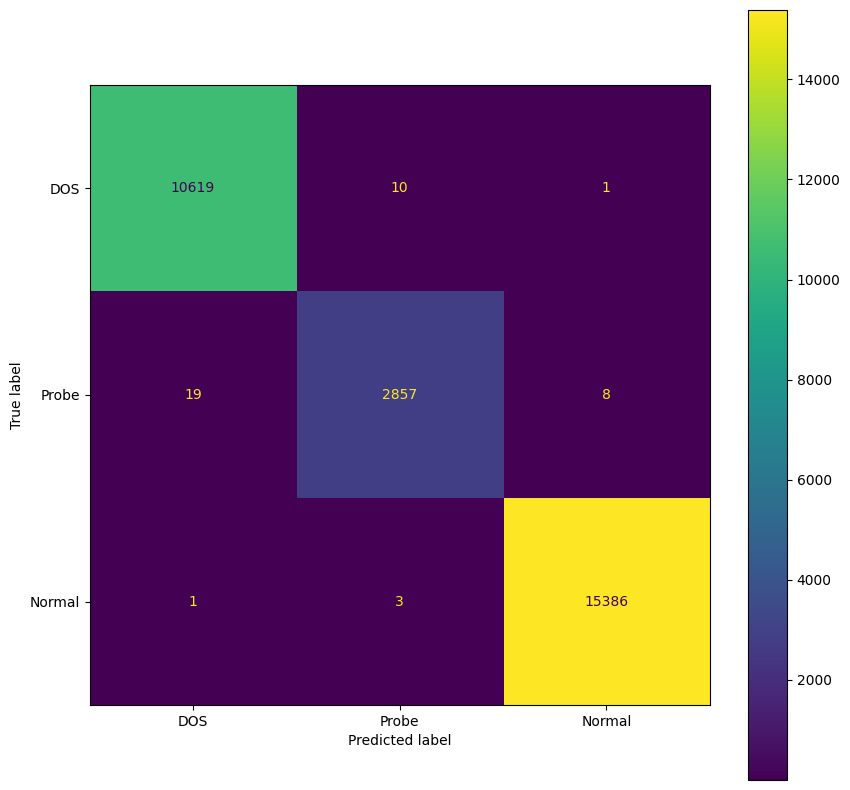

In [ ]:
evaluate_classification(gb_modp, "GRADIENT BOOSTING", x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced)

In [ ]:
#MULTI-LAYER PERCEPTRON
mlp_mod = MLPClassifier(hidden_layer_sizes=[100,50])
mlp_mod.fit(x_train, y_train)
metrics.accuracy_score(y_test, mlp_mod.predict(x_test))

0.9665812855198911

In [ ]:
mlp_modp = MLPClassifier(hidden_layer_sizes=[100,50])
mlp_modp.fit(x_train_reduced, y_train_reduced)
metrics.accuracy_score(y_test_reduced, mlp_modp.predict(x_test_reduced))

0.887857200032018

In [ ]:
#LOGISTIC REGRESSION
lg_mod = LogisticRegression()
lg_mod.fit(x_train, y_train)
metrics.accuracy_score(y_test, lg_mod.predict(x_test))

0.8436724565756824

In [ ]:
9klg_modp = LogisticRegression()
lg_modp.fit(x_train_reduced, y_train_reduced)
metrics.accuracy_score(y_test_reduced, lg_modp.predict(x_test_reduced))

0.8245017209637397